# Análise Estrutural 2

Frederico Furst Bittencourt _ 6 de maio de 2020 _ EMGE

In [2]:
import sympy as sy
import pandas as pd
from IPython.display import Image

# Questoes 1 e 2 _ Forças

## Vars

In [3]:
A, B, C, x = sy.symbols('A B C x')

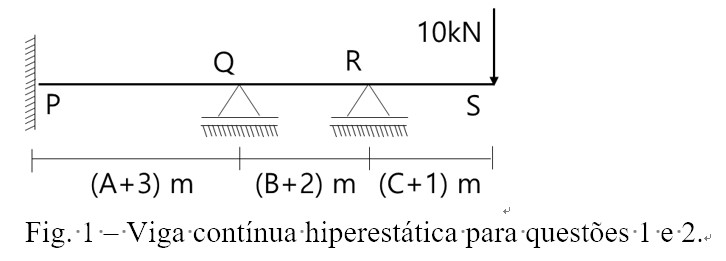

In [4]:
Image('Annotation 2020-05-03 124940.jpg')

## Momentos

In [5]:
Mp = -10*(A+B+C+6-x)

In [6]:
Mq1 = A+3-x

In [7]:
Mq2 = A+B+5-x

## Integrais

In [8]:
delta_y_P_q1 = sy.integrate(Mp*Mq1,(x,0,A+3))

In [9]:
delta_y_P_q2 = sy.integrate(Mp*Mq2,(x,0,A+B+5))

In [10]:
delta_y_q1_q1 = sy.integrate(Mq1*Mq1,(x,0,A+3))

In [11]:
delta_y_q2_q2 = sy.integrate(Mq2*Mq2,(x,0,A+B+5))

In [12]:
delta_y_q1_q2 = sy.integrate(Mq1*Mq2,(x,0,A+3))

# Sistema

In [13]:
compliance = sy.Matrix([
    [ delta_y_q1_q1, delta_y_q1_q2, ],
    [ delta_y_q1_q2, delta_y_q2_q2, ],
])

In [14]:
displacements = sy.Matrix([
    [ delta_y_P_q1, ],
    [ delta_y_P_q2, ],
])

In [15]:
reactions = -compliance.inv()*displacements

In [16]:
R1 = reactions[0]

In [17]:
R2 = reactions[1]

In [18]:
MA = 10*(A+B+C+6)-R1*(A+3)-R2*(A+B+5)

In [19]:
RA = 10-R1-R2

In [20]:
MA.subs([(A,3),(B,2),(C,6)]).evalf(3)

8.23

In [21]:
RA.subs([(A,3),(B,2),(C,6)]).evalf(3)

4.12

In [22]:
R1.subs([(A,3),(B,2),(C,6)]).evalf(3)

-25.7

In [23]:
R2.subs([(A,3),(B,2),(C,6)]).evalf(3)

31.6

# Questoes 1 e 2 _ Deslocamentos

## Vars

In [24]:
L1 = A+3
L2 = B+2
L3 = C+1
E, I = sy.symbols('E I')

## Rigidez

Duas opções: fazer com duas deslocabilidades de rotação $D_1$ e $D_2$, ou então fazer com quatro deslocabilidades $D_1$, $D_2$, $D_3$ e $D_4$, sendo uma de deslocamento vertical.

### Quatro deslocabilidades

In [25]:
stiffness1_four = sy.Matrix([
    [ 4*E*I/L1, 0, 0, 0, ],
    [ 0,        0, 0, 0, ],
    [ 0,        0, 0, 0, ],
    [ 0,        0, 0, 0, ],
])
stiffness2_four = sy.Matrix([
    [ 4*E*I/L2, 2*E*I/L2, 0, 0, ],
    [ 2*E*I/L2, 4*E*I/L2, 0, 0, ],
    [ 0,        0,        0, 0, ],
    [ 0,        0,        0, 0, ],
])
#stiffness3_four = sy.Matrix([
#    [ 0, 0,        0,            0,            ],
#    [ 0, 4*E*I/L3, 2*E*I/L3,     0,            ],
#    [ 0, 2*E*I/L3, 4*E*I/L3,     -6*E*I/L3**2, ],
#    [ 0, 0,       -6*E*I/L3**2,  12*E*I/L3**3, ],
#])
stiffness3_four = sy.Matrix([
    [ 0,  0,            0,            0,            ],
    [ 0,  4*E*I/L3,     2*E*I/L3,    -6*E*I/L3**2,  ],
    [ 0,  2*E*I/L3,     4*E*I/L3,    -6*E*I/L3**2,  ],
    [ 0, -6*E*I/L3**2, -6*E*I/L3**2,  12*E*I/L3**3, ],
])

In [26]:
stiffness_four = stiffness1_four + stiffness2_four + stiffness3_four

### Duas deslocabilidades

In [27]:
stiffness1_two = sy.Matrix([
    [ 4*E*I/L1, 0, ],
    [ 0,        0, ],
])
stiffness2_two = sy.Matrix([
    [ 4*E*I/L2, 2*E*I/L2, ],
    [ 2*E*I/L2, 4*E*I/L2, ],
])
stiffness_two = stiffness1_two + stiffness2_two

## Termos de carga

### Quatro deslocabilidades

In [28]:
loads_four = sy.Matrix([
    [ 0,   ],
    [ 0,   ],
    [ 0,   ],
    [ -10, ],
])

### Duas deslocabilidades

In [29]:
loads_two = sy.Matrix([
    [ 0,     ],
    [ -10*L3, ],
])

## Sistemas

### Quatro deslocabilidades

In [30]:
disp_four = stiffness_four.inv()*loads_four

In [31]:
disp_four.subs([(A,3),(B,2),(C,6)]).evalf(3)

Matrix([
[    24.7/(E*I)],
[   -82.4/(E*I)],
[  -327.0/(E*I)],
[-1.72e+3/(E*I)]])

### Duas deslocabilidades

In [32]:
disp_two = stiffness_two.inv()*loads_two

In [33]:
disp_two.subs([(A,3),(B,2),(C,6)]).evalf(3)

Matrix([
[ 24.7/(E*I)],
[-82.4/(E*I)]])

## Reações de Apoio

### Quatro deslocabilidades

In [34]:
reac_stiff1_four = sy.Matrix([
    [  2*E*I/L1,     0, 0, 0, ], # nó P rot
    [  6*E*I/L1**2,  0, 0, 0, ], # nó P vert
    [ -6*E*I/L1**2,  0, 0, 0, ], # nó Q vert
    [  0,            0, 0, 0, ], # nó R vert
])
reac_stiff2_four = sy.Matrix([
    [  0,            0,           0, 0, ], # nó P rot
    [  0,            0,           0, 0, ], # nó P vert
    [  6*E*I/L2**2,  6*E*I/L2**2, 0, 0, ], # nó Q vert
    [ -6*E*I/L2**2, -6*E*I/L2**2, 0, 0, ], # nó R vert
])
reac_stiff3_four = sy.Matrix([
    [  0,  0,             0,            0,            ], # nó P rot
    [  0,  0,             0,            0,            ], # nó P vert
    [  0,  0,             0,            0,            ], # nó Q vert
    [  0,  6*E*I/L3**2,   6*E*I/L3**2, -12*E*I/L3**3, ], # nó R vert
#    [  0, -6*E*I/L3**2, -6*E*I/L3**2, 12*E*I/L3**3, ], # nó R vert
])
reac_stiff_four = reac_stiff1_four + reac_stiff2_four + reac_stiff3_four

In [35]:
reac_four = reac_stiff_four*disp_four

In [36]:
reac_four.subs([(A,3),(B,2),(C,6)]).evalf(3)

Matrix([
[ 8.23],
[ 4.12],
[-25.7],
[ 31.6]])

#### Superposição

In [37]:
# reac_four

### Duas deslocabilidades

In [38]:
reac_stiff1_two = sy.Matrix([
    [  2*E*I/L1,     0, ], # nó P rot
    [  6*E*I/L1**2,  0, ], # nó P vert
    [ -6*E*I/L1**2,  0, ], # nó Q vert
    [  0,            0, ], # nó R vert
])
reac_stiff2_two = sy.Matrix([
    [  0,            0,           ], # nó P rot
    [  0,            0,           ], # nó P vert
    [  6*E*I/L2**2,  6*E*I/L2**2, ], # nó Q vert
    [ -6*E*I/L2**2, -6*E*I/L2**2, ], # nó R vert
])
reac_stiff_two = reac_stiff1_two + reac_stiff2_two

#### Superposição

In [39]:
reac_two = reac_stiff_two*disp_two

In [40]:
reac_two.subs([(A,3),(B,2),(C,6)]).evalf(3)

Matrix([
[ 8.23],
[ 4.12],
[-25.7],
[ 21.6]])

Faltou considerar o termo de carga?

In [41]:
# reac_two.subs([(A,2),(B,3),(C,9)]).evalf(3)

## Diagramas

In [42]:
Q2_DEC1 = RA
Q2_DEC2 = RA + R1
Q2_DEC3 = RA + R1 + R2

In [43]:
Q2_DMF1 = -10*(L2+L3)+R2*L2
Q2_DMF2 = -10*L3

# Questoes 3 e 4 _ Forcas

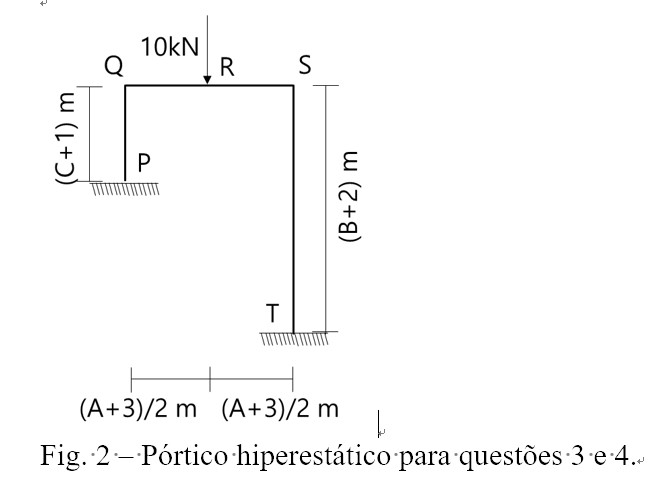

In [44]:
Image('Annotation 2020-05-03 125000.jpg')

## Vars

In [45]:
x1, x2, x3, x4 = sy.symbols('x1, x2, x3, x4')

## Momentos

$$ 0<x_1<C+1$$

In [46]:
Mp_x1 = 0
Mq1_x1 = -1
Mq2_x1 = 0
Mq3_x1 = x1

$$ 0<x_2<\frac{A+3}{2}$$

In [47]:
Mp_x2 = 5*x2
Mq1_x2 = -1*(1-x2/(A+3))
Mq2_x2 = x2/(A+3)
Mq3_x2 = (C+1)+(B-C+1)/(A+3)*x2

$$ 0<x_3<\frac{A+3}{2} $$

In [48]:
Mp_x3 = 5*((A+3)/2-x3)
Mq1_x3 = -1/2*(2/(A+3))*((A+3)/2-x3)
Mq2_x3 = 1/2+1/2*2/(A+3)*x3
Mq3_x3 = (B+C+3)/2+x3/(A+3)*(B-C+1)

$$ 0 < x_4 < B+2 $$

In [49]:
Mp_x4 = 0
Mq1_x4 = 0
Mq2_x4 = 1
Mq3_x4 = B+2-x4

## Integrais

In [50]:
# def integra_func(f):
#     return sy.integrate(Mp_x1*Mq1_x1,(x1,0,C+1))+sy.integrate(Mp_x2*Mq1_x2,(x2,0,(A+3)/2))+\
#         +sy.integrate(Mp_x3*Mq1_x3,(x3,0,(A+3)/2))+sy.integrate(Mp_x4*Mq1_x4,(x4,0,B+2))

In [51]:
delta_y_P_q1 = sy.integrate(Mp_x1*Mq1_x1,(x1,0,C+1))+sy.integrate(Mp_x2*Mq1_x2,(x2,0,(A+3)/2))+\
    +sy.integrate(Mp_x3*Mq1_x3,(x3,0,(A+3)/2))+sy.integrate(Mp_x4*Mq1_x4,(x4,0,B+2))
delta_y_P_q2 = sy.integrate(Mp_x1*Mq2_x1,(x1,0,C+1))+sy.integrate(Mp_x2*Mq2_x2,(x2,0,(A+3)/2))+\
    +sy.integrate(Mp_x3*Mq2_x3,(x3,0,(A+3)/2))+sy.integrate(Mp_x4*Mq2_x4,(x4,0,B+2))
delta_y_P_q3 = sy.integrate(Mp_x1*Mq3_x1,(x1,0,C+1))+sy.integrate(Mp_x2*Mq3_x2,(x2,0,(A+3)/2))+\
    +sy.integrate(Mp_x3*Mq3_x3,(x3,0,(A+3)/2))+sy.integrate(Mp_x4*Mq3_x4,(x4,0,B+2))

In [52]:
delta_y_q1_q1 = sy.integrate(Mq1_x1*Mq1_x1,(x1,0,C+1))+sy.integrate(Mq1_x2*Mq1_x2,(x2,0,(A+3)/2))+\
    +sy.integrate(Mq1_x3*Mq1_x3,(x3,0,(A+3)/2))+sy.integrate(Mq1_x4*Mq1_x4,(x4,0,B+2))
delta_y_q2_q2 = sy.integrate(Mq2_x1*Mq2_x1,(x1,0,C+1))+sy.integrate(Mq2_x2*Mq2_x2,(x2,0,(A+3)/2))+\
    +sy.integrate(Mq2_x3*Mq2_x3,(x3,0,(A+3)/2))+sy.integrate(Mq2_x4*Mq2_x4,(x4,0,B+2))
delta_y_q3_q3 = sy.integrate(Mq3_x1*Mq3_x1,(x1,0,C+1))+sy.integrate(Mq3_x2*Mq3_x2,(x2,0,(A+3)/2))+\
    +sy.integrate(Mq3_x3*Mq3_x3,(x3,0,(A+3)/2))+sy.integrate(Mq3_x4*Mq3_x4,(x4,0,B+2))

In [53]:
delta_y_q1_q2 = sy.integrate(Mq1_x1*Mq2_x1,(x1,0,C+1))+sy.integrate(Mq1_x2*Mq2_x2,(x2,0,(A+3)/2))+\
    +sy.integrate(Mq1_x3*Mq2_x3,(x3,0,(A+3)/2))+sy.integrate(Mq1_x4*Mq2_x4,(x4,0,B+2))
delta_y_q2_q3 = sy.integrate(Mq2_x1*Mq3_x1,(x1,0,C+1))+sy.integrate(Mq2_x2*Mq3_x2,(x2,0,(A+3)/2))+\
    +sy.integrate(Mq2_x3*Mq3_x3,(x3,0,(A+3)/2))+sy.integrate(Mq2_x4*Mq3_x4,(x4,0,B+2))
delta_y_q3_q1 = sy.integrate(Mq3_x1*Mq1_x1,(x1,0,C+1))+sy.integrate(Mq3_x2*Mq1_x2,(x2,0,(A+3)/2))+\
    +sy.integrate(Mq3_x3*Mq1_x3,(x3,0,(A+3)/2))+sy.integrate(Mq3_x4*Mq1_x4,(x4,0,B+2))

## Sistema

In [54]:
# compliance = sy.Matrix([
#     [ delta_y_q1_q1, delta_y_q1_q2, delta_y_q3_q1, ],
#     [ delta_y_q1_q2, delta_y_q2_q2, delta_y_q2_q3, ],
#     [ delta_y_q3_q1, delta_y_q2_q3, delta_y_q3_q3, ],
# ]).simplify()

In [55]:
compliance = sy.Matrix([
    [ delta_y_q1_q1.simplify(), delta_y_q1_q2.simplify(), delta_y_q3_q1.simplify(), ],
    [ delta_y_q1_q2.simplify(), delta_y_q2_q2.simplify(), delta_y_q2_q3.simplify(), ],
    [ delta_y_q3_q1.simplify(), delta_y_q2_q3.simplify(), delta_y_q3_q3.simplify(), ],
])

In [56]:
inversa = compliance.inv()

In [57]:
displacements = sy.Matrix([
    [ delta_y_P_q1, ],
    [ delta_y_P_q2, ],
    [ delta_y_P_q3, ],
])

In [58]:
reactions = -inversa*displacements

In [59]:
MP = reactions[0]
MT = reactions[1]
RTx = reactions[2]

In [60]:
RPx = -RTx
RPy = 5+MP/(A+3)+MT/(A+3)+RTx*(B-C+1)/(A+3)
RTy = 5-MP/(A+3)-MT/(A+3)-RTx*(B-C+1)/(A+3)
# RTy = 10-RPy

In [61]:
RPx.subs([(A,3),(B,2),(C,6)]).evalf(3)

1.23

In [62]:
RPy.subs([(A,3),(B,2),(C,6)]).evalf(3)

5.14

In [63]:
MP.subs([(A,3),(B,2),(C,6)]).evalf(3)

-3.27

In [64]:
RTx.subs([(A,3),(B,2),(C,6)]).evalf(3)

-1.23

In [65]:
RTy.subs([(A,3),(B,2),(C,6)]).evalf(3)

4.86

In [66]:
MT.subs([(A,3),(B,2),(C,6)]).evalf(3)

0.429

# Questões 3 e 4 _ Deslocamentos

## Vars

In [67]:
L1 = C+1
L2 = A+3
L3 = B+2
E, I, S = sy.symbols('E I S')

## Rigidez

In [68]:
stiffness1 = sy.Matrix([
    [ 4*E*I/L1, 0, ],
    [ 0,        0, ],
])
stiffness2 = sy.Matrix([
    [ 4*E*I/L2, 2*E*I/L2, ],
    [ 2*E*I/L2, 4*E*I/L2, ],
])
stiffness3 = sy.Matrix([
    [ 0, 0,        ],
    [ 0, 4*E*I/L3, ],
])
stiffness = stiffness1 + stiffness2 + stiffness3

<p> Pra portico full, usa-se a rigidez completa... na ordem: $x, y, z$
<p> Ou seja, $D_1 ... x,y,z$ e $D_2 ... x,y,z$ 

In [69]:
fstiffness1 = sy.Matrix([
    [  12*E*I/L1**3,  0,      6*E*I/L1**2, 0, 0, 0, ],
    [  0,             E*S/L1, 0,           0, 0, 0, ],
    [  6*E*I/L1**2,   0,      4*E*I/L1,    0, 0, 0, ],
    [  0,             0,      0,           0, 0, 0, ],
    [  0,             0,      0,           0, 0, 0, ],
    [  0,             0,      0,           0, 0, 0, ],
])
fstiffness2 = sy.Matrix([
    [  E*S/L2,  0,             0,           -E*S/L2,  0,             0,           ],
    [  0,       12*E*I/L2**3,  6*E*I/L2**2,  0,      -12*E*I/L2**3,  6*E*I/L2**2, ],
    [  0,       6*E*I/L2**2,   4*E*I/L2,     0,      -6*E*I/L2**2,   2*E*I/L2,    ],
    [ -E*S/L2,  0,             0,            E*S/L2,  0,             0,           ],
    [  0,      -12*E*I/L2**3, -6*E*I/L2**2,  0,       12*E*I/L2**3, -6*E*I/L2**2, ],
    [  0,       6*E*I/L2**2,   2*E*I/L2,     0,      -6*E*I/L2**2,   4*E*I/L2,    ],
])
fstiffness3 = sy.Matrix([
    [  0, 0, 0,  0,             0,       0,           ],
    [  0, 0, 0,  0,             0,       0,           ],
    [  0, 0, 0,  0,             0,       0,           ],
    [  0, 0, 0,  12*E*I/L3**3,  0,       6*E*I/L3**2, ],
    [  0, 0, 0,  0,             E*S/L3,  0,           ],
    [  0, 0, 0,  6*E*I/L3**2,   0,       4*E*I/L3,    ],
])
fstiffness = (fstiffness1 + fstiffness2 + fstiffness3).subs([(I,1),(S,12),(A,3),(B,2),(C,6)])

## Termos de Carga

In [70]:
loads = sy.Matrix([
    [  10*(A+3)/8, ],
    [ -10*(A+3)/8, ],
])

In [71]:
loads.subs([(A,3),(B,2),(C,6)])

Matrix([
[ 15/2],
[-15/2]])

In [72]:
floads = sy.Matrix([
    [ 0, ],
    [ 5, ],
    [ 10*(A+3)/8, ],
    [ 0, ],
    [ 5, ],
    [ -10*(A+3)/8, ],
]).subs([(A,3),(B,2),(C,6)])

## Sistema

In [73]:
disp = -stiffness.inv()*loads

In [74]:
disp.subs([(A,3),(B,2),(C,6)]).evalf(3)

Matrix([
[-7.68/(E*I)],
[ 6.04/(E*I)]])

In [75]:
fstiffness

Matrix([
[698*E/343,         0,  6*E/49,    -2*E,       0,     0],
[        0, 223*E/126,     E/6,       0,   -E/18,   E/6],
[   6*E/49,       E/6, 26*E/21,       0,    -E/6,   E/3],
[     -2*E,         0,       0, 35*E/16,       0, 3*E/8],
[        0,     -E/18,    -E/6,       0, 55*E/18,  -E/6],
[        0,       E/6,     E/3,   3*E/8,    -E/6, 5*E/3]])

In [76]:
fdisp = -fstiffness.inv()*floads

In [77]:
fdisp.subs([(E,1)]).evalf(3)

Matrix([
[-9.67],
[-2.99],
[-7.17],
[-10.3],
[-1.62],
[ 8.38]])

## Reações de Apoio

In [78]:
reac_stiff1 = sy.Matrix([
    [ -6*E*I/L1**2, 0, ], # nó P hor
    [  0,           0, ], # nó P vert
    [  2*E*I/L1,    0, ], # nó P rot
    [  0,           0, ], # nó T hor
    [  0,           0, ], # nó T vert
    [  0,           0, ], # nó T rot
])

In [79]:
reac_stiff2 = sy.Matrix([
    [  0,            0,           ], # nó P hor
    [  6*E*I/L2**2,  6*E*I/L2**2, ], # nó P vert
    [  0,            0,           ], # nó P rot
    [  0,            0,           ], # nó T hor
    [ -6*E*I/L2**2, -6*E*I/L2**2, ], # nó T vert
    [  0,            0,           ], # nó T rot
])

In [80]:
reac_stiff3 = sy.Matrix([
    [ 0,  0,           ], # nó P hor
    [ 0,  0,           ], # nó P vert
    [ 0,  0,           ], # nó P rot
    [ 0, -6*E*I/L3**2, ], # nó T hor
    [ 0,  0,           ], # nó T vert
    [ 0,  2*E*I/L3,    ], # nó T rot
])

In [81]:
reac_stiff = reac_stiff1 + reac_stiff2 + reac_stiff3

In [82]:
reacoes = reac_stiff*disp + sy.Matrix([
    [ 0, ],
    [ 5, ],
    [ 0, ],
    [ 0, ],
    [ 5, ],
    [ 0, ],
])

In [83]:
(reac_stiff3*disp).subs([(A,3),(B,2),(C,6)]).evalf(3)

Matrix([
[    0],
[    0],
[    0],
[-2.26],
[    0],
[ 3.02]])

In [84]:
reacoes.subs([(A,3),(B,2),(C,6)]).evalf(3)

Matrix([
[0.941],
[ 4.73],
[ -2.2],
[-2.26],
[ 5.27],
[ 3.02]])

In [85]:
Q4_DEN1 = -RPy
Q4_DEN2 = -RPx
Q4_DEN3 = -RTy

In [86]:
Q4_DEC1 = -RPx 
Q4_DEC2 = RPy
Q4_DEC3 = -RTy
Q4_DEC4 = -RTx

In [87]:
Q4_DMF1 = -MP -L1*RPx
Q4_DMF2 = -MP +L2*RPy/2
Q4_DMF3 = MT +L3*RTx

# Alunos

## Resultados por Aluno

In [88]:
alunos = pd.read_csv('Turma_AE2.csv')
alunos.head()

,Matr?cula,Nome,A,B,C
0,E00326,ANA B?RBARA SILVA,3,2,6
1,E00239,ANA CAROLINA DE ALMEIDA CARDOSO,2,3,9
2,E00181,ARTHUR MICRONI BEZERRA,1,8,1
3,E00329,B?RBARA D'ARC DA SILVA MOTA,3,2,9
4,E00336,BRANDON FROIS SALES,3,3,6


In [90]:
# corrigir e melhor a apresentacao deste trecho, que eh o mais importante
for aluno in alunos.itertuples():
    print(aluno.Nome)# , aluno.A, aluno.B, aluno.C)
    print(" Q1,2 forcas  \tR1? ",R1.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]),
          " = ",R1.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tR2? ",R2.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]),
          " = ",R2.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tMA? ",MA.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]),
          " = ",MA.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tRA? ",RA.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]),
          " = ",RA.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3))
    print(" Q1,2 desl_2  \tD1? ",disp_two[0].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]),
          " = ",disp_two[0].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tD2? ",disp_two[1].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]),
          " = ",disp_two[1].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3))
#    print(" Q1,2 desl_4  \tD1? ",disp_four[0].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]),
#          " = ",disp_four[0].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
#          "\tD2? ",disp_four[1].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]),
#          " = ",disp_four[1].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
#          "\tD3? ",disp_four[2].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]),
#          " = ",disp_four[2].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
#          "\tD4? ",disp_four[3].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]),
#          " = ",disp_four[3].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3))
    print("   Q2 \tDEC1? ",Q2_DEC1.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tDEC2? ",Q2_DEC2.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tDEC3? ",Q2_DEC3.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3))
    print("   Q2 \tDMF1? ",Q2_DMF1.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tDMF2? ",Q2_DMF2.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3))
    print(" Q3,4 forcas  \tMP? ",MP.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tRPx? ",RPx.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tRPy? ",RPy.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3))
    print(" Q3,4 forcas  \tMT? ",MT.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tRTx? ",RTx.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tRTy? ",RTy.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3))
    print(" Q3,4 desl  \tD1? ",disp[0].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]),
          " = ",disp[0].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tD2? ",disp[1].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]),
          " = ",disp[1].subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3))
    print("   Q4 \tDEN1? ",Q4_DEN1.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tDEN2? ",Q4_DEN2.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tDEN3? ",Q4_DEN3.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3))
    print("   Q4 \tDEC1? ",Q4_DEC1.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tDEC2? ",Q4_DEC2.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tDEC3? ",Q4_DEC3.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tDEC4? ",Q4_DEC4.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3))
    print("   Q4 \tDMF1? ",Q4_DMF1.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tDMF2? ",Q4_DMF2.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3),
          "\tDMF3? ",Q4_DMF3.subs([(A,aluno.A),(B,aluno.B),(C,aluno.C)]).evalf(3))
    print()

ANA B?RBARA SILVA
 Q1,2 forcas  	R1?  -875/34  =  -25.7 	R2?  1075/34  =  31.6 	MA?  140/17  =  8.23 	RA?  70/17  =  4.12
 Q1,2 desl_2  	D1?  420/(17*E*I)  =  24.7/(E*I) 	D2?  -1400/(17*E*I)  =  -82.4/(E*I)
   Q2 	DEC1?  4.12 	DEC2?  -21.6 	DEC3?  10.0
   Q2 	DMF1?  16.5 	DMF2?  -70.0
 Q3,4 forcas  	MP?  -3.27 	RPx?  1.23 	RPy?  5.14
 Q3,4 forcas  	MT?  0.429 	RTx?  -1.23 	RTy?  4.86
 Q3,4 desl  	D1?  -315/(41*E*I)  =  -7.68/(E*I) 	D2?  495/(82*E*I)  =  6.04/(E*I)
   Q4 	DEN1?  -5.14 	DEN2?  -1.23 	DEN3?  -4.86
   Q4 	DEC1?  -1.23 	DEC2?  5.14 	DEC3?  -4.86 	DEC4?  1.23
   Q4 	DMF1?  -5.35 	DMF2?  18.7 	DMF3?  -4.50

ANA CAROLINA DE ALMEIDA CARDOSO
 Q1,2 forcas  	R1?  -240/7  =  -34.3 	R2?  250/7  =  35.7 	MA?  100/7  =  14.3 	RA?  60/7  =  8.57
 Q1,2 desl_2  	D1?  250/(7*E*I)  =  35.7/(E*I) 	D2?  -1000/(7*E*I)  =  -143.0/(E*I)
   Q2 	DEC1?  8.57 	DEC2?  -25.7 	DEC3?  10.0
   Q2 	DMF1?  28.6 	DMF2?  -100.
 Q3,4 forcas  	MP?  -2.20 	RPx?  0.582 	RPy?  5.13
 Q3,4 forcas  	MT?  -0.0710 	R

 Q1,2 desl_2  	D1?  192/(5*E*I)  =  38.4/(E*I) 	D2?  -896/(5*E*I)  =  -179.0/(E*I)
   Q2 	DEC1?  6.40 	DEC2?  -13.2 	DEC3?  10.0
   Q2 	DMF1?  25.6 	DMF2?  -80.0
 Q3,4 forcas  	MP?  -2.25 	RPx?  0.844 	RPy?  5.00
 Q3,4 forcas  	MT?  2.25 	RTx?  -0.844 	RTy?  5.00
 Q3,4 desl  	D1?  -9/(E*I)  =  -9.0/(E*I) 	D2?  9/(E*I)  =  9.0/(E*I)
   Q4 	DEN1?  -5.00 	DEN2?  -0.844 	DEN3?  -5.00
   Q4 	DEC1?  -0.844 	DEC2?  5.00 	DEC3?  -5.00 	DEC4?  0.844
   Q4 	DMF1?  -4.50 	DMF2?  17.3 	DMF3?  -4.50

FABRICIO ALMEIDA SILVA
 Q1,2 forcas  	R1?  -189/4  =  -47.3 	R2?  52  =  52.0 	MA?  7  =  7.00 	RA?  21/4  =  5.25
 Q1,2 desl_2  	D1?  14/(E*I)  =  14.0/(E*I) 	D2?  -42/(E*I)  =  -42.0/(E*I)
   Q2 	DEC1?  5.25 	DEC2?  -42.0 	DEC3?  10.0
   Q2 	DMF1?  14.0 	DMF2?  -70.0
 Q3,4 forcas  	MP?  -1.69 	RPx?  0.656 	RPy?  5.02
 Q3,4 forcas  	MT?  -1.50 	RTx?  -0.656 	RTy?  4.98
 Q3,4 desl  	D1?  -98/(25*E*I)  =  -3.92/(E*I) 	D2?  58/(25*E*I)  =  2.32/(E*I)
   Q4 	DEN1?  -5.02 	DEN2?  -0.656 	DEN3?  -4.98
   Q4

 Q3,4 forcas  	MT?  1.94 	RTx?  -0.535 	RTy?  5.06
 Q3,4 desl  	D1?  -50/(7*E*I)  =  -7.14/(E*I) 	D2?  425/(56*E*I)  =  7.59/(E*I)
   Q4 	DEN1?  -4.94 	DEN2?  -0.535 	DEN3?  -5.06
   Q4 	DEC1?  -0.535 	DEC2?  4.94 	DEC3?  -5.06 	DEC4?  0.535
   Q4 	DMF1?  -3.09 	DMF2?  13.5 	DMF3?  -3.41

LOUISE RACHI VARTULI
 Q1,2 forcas  	R1?  -1080/49  =  -22.0 	R2?  1300/49  =  26.5 	MA?  90/7  =  12.9 	RA?  270/49  =  5.51
 Q1,2 desl_2  	D1?  45/(E*I)  =  45.0/(E*I) 	D2?  -180/(E*I)  =  -180.0/(E*I)
   Q2 	DEC1?  5.51 	DEC2?  -16.5 	DEC3?  10.0
   Q2 	DMF1?  25.7 	DMF2?  -90.0
 Q3,4 forcas  	MP?  -3.34 	RPx?  1.01 	RPy?  5.08
 Q3,4 forcas  	MT?  1.88 	RTx?  -1.01 	RTy?  4.92
 Q3,4 desl  	D1?  -1575/(136*E*I)  =  -11.6/(E*I) 	D2?  1435/(136*E*I)  =  10.6/(E*I)
   Q4 	DEN1?  -5.08 	DEN2?  -1.01 	DEN3?  -4.92
   Q4 	DEC1?  -1.01 	DEC2?  5.08 	DEC3?  -4.92 	DEC4?  1.01
   Q4 	DMF1?  -5.79 	DMF2?  21.1 	DMF3?  -5.22

LUIZA MARIA FERREIRA LEMES
 Q1,2 forcas  	R1?  -363/19  =  -19.1 	R2?  478/19  =  25.2

 Q1,2 forcas  	R1?  -1536/649  =  -2.37 	R2?  7300/649  =  11.2 	MA?  110/59  =  1.86 	RA?  66/59  =  1.12
 Q1,2 desl_2  	D1?  275/(59*E*I)  =  4.66/(E*I) 	D2?  -1760/(59*E*I)  =  -29.8/(E*I)
   Q2 	DEC1?  1.12 	DEC2?  -1.25 	DEC3?  10.0
   Q2 	DMF1?  3.73 	DMF2?  -10.0
 Q3,4 forcas  	MP?  4.73 	RPx?  0.367 	RPy?  5.49
 Q3,4 forcas  	MT?  1.39 	RTx?  -0.367 	RTy?  4.51
 Q3,4 desl  	D1?  -5375/(2984*E*I)  =  -1.8/(E*I) 	D2?  17875/(2984*E*I)  =  5.99/(E*I)
   Q4 	DEN1?  -5.49 	DEN2?  -0.367 	DEN3?  -4.51
   Q4 	DEC1?  -0.367 	DEC2?  5.49 	DEC3?  -4.51 	DEC4?  0.367
   Q4 	DMF1?  -5.10 	DMF2?  8.99 	DMF3?  -2.65

RAPHAEL AUGUSTO PEREIRA DIAS
 Q1,2 forcas  	R1?  -480/49  =  -9.80 	R2?  850/49  =  17.3 	MA?  40/7  =  5.71 	RA?  120/49  =  2.45
 Q1,2 desl_2  	D1?  20/(E*I)  =  20.0/(E*I) 	D2?  -80/(E*I)  =  -80.0/(E*I)
   Q2 	DEC1?  2.45 	DEC2?  -7.35 	DEC3?  10.0
   Q2 	DMF1?  11.4 	DMF2?  -40.0
 Q3,4 forcas  	MP?  -0.503 	RPx?  1.51 	RPy?  4.85
 Q3,4 forcas  	MT?  4.02 	RTx?  -1.51 	RTy? 